## What combination of spins do we measure?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pycbc import conversions, psd
from pycbc.filter import match

from simple_pe.param_est import metric
from pesummary.utils.samples_dict import SamplesDict

In [2]:
import logging
_logger = logging.getLogger('PESummary')
_logger.setLevel(logging.CRITICAL + 10)

In [3]:
ifos = ['H1', 'L1', 'V1']

psds = {'H1': 'aLIGOMidHighSensitivityP1200087',
        'L1': 'aLIGOMidHighSensitivityP1200087',
        'V1': 'AdVMidHighSensitivityP1200087',
        'f_low': 20.,
        'f_high': 8192,
        'length': 32
        }

psds['delta_f'] = 1. / psds['length']

approximant = 'IMRPhenomXPHM'

In [4]:
pycbc_psd = {}
for ifo in ifos:
    pycbc_psd[ifo] = psd.analytical.from_string(psds[ifo], psds['length'] * psds['f_high'] + 1, psds['delta_f'],
                                                psds['f_low'])

pycbc_psd['harm'] = 3. / sum([1. / pycbc_psd[ifo] for ifo in ifos])

/home/spxsf2/miniconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:375: RuntimeWarning: divide by zero encountered in true_divide
  return self._data.__rtruediv__(other)


In [5]:
dx_directions = ['spin_1z', 'spin_2z']

In [6]:
s1z = 0.
s2z = 0.
dist = 1.
snr = 15

In [21]:
Mcs, qs = np.mgrid[10:100:10j,0.2:0.9:8j]
qs[:,-1] = 0.95
spin_ratio = np.zeros_like(Mcs)

In [22]:
for i,mc in np.ndenumerate(Mcs):
    params = {'chirp_mass': mc,
              'mass_ratio': qs[i],
              'spin_1z': s1z,
              'spin_2z': s2z,
              'distance': dist
            }
    print("running Mchirp=%d, q=%.2f" % (mc, qs[i]))
    g = metric.find_metric_and_eigendirections(params, dx_directions, snr, psds['f_low'], pycbc_psd['harm'], 
                                     approximant, tolerance=0.05, max_iter=20)
    evecs = g.normalized_evecs()
    spin_ratio[i] = np.abs(min(evecs.samples[1]/evecs.samples[0]))

running Mchirp=10, q=0.20
running Mchirp=10, q=0.30
running Mchirp=10, q=0.40
running Mchirp=10, q=0.50
running Mchirp=10, q=0.60
running Mchirp=10, q=0.70
running Mchirp=10, q=0.80
running Mchirp=10, q=0.90
running Mchirp=10, q=0.95
running Mchirp=20, q=0.20
running Mchirp=20, q=0.30
running Mchirp=20, q=0.40
running Mchirp=20, q=0.50
running Mchirp=20, q=0.60
running Mchirp=20, q=0.70
running Mchirp=20, q=0.80
running Mchirp=20, q=0.90
running Mchirp=20, q=0.95
running Mchirp=30, q=0.20
running Mchirp=30, q=0.30
running Mchirp=30, q=0.40
running Mchirp=30, q=0.50
running Mchirp=30, q=0.60
running Mchirp=30, q=0.70
running Mchirp=30, q=0.80
running Mchirp=30, q=0.90
running Mchirp=30, q=0.95
running Mchirp=40, q=0.20
running Mchirp=40, q=0.30
running Mchirp=40, q=0.40
running Mchirp=40, q=0.50
running Mchirp=40, q=0.60
running Mchirp=40, q=0.70
running Mchirp=40, q=0.80
running Mchirp=40, q=0.90
running Mchirp=40, q=0.95
running Mchirp=50, q=0.20
running Mchirp=50, q=0.30
running Mchi

In [27]:
spin_ratio = spin_ratio[:, :-1]

Text(0, 0.5, 'mass ratio, m1/m2')

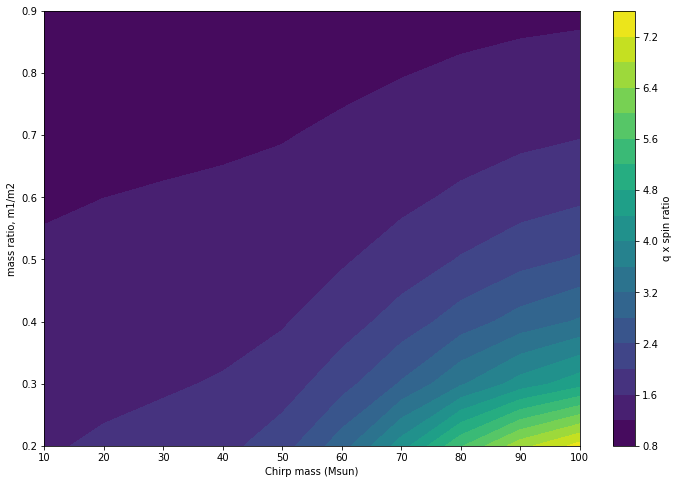

In [37]:
plt.figure(figsize=(12,8))
plt.contourf(Mcs, qs, qs*spin_ratio, levels=20)
plt.colorbar(label='q x spin ratio')
plt.xlabel('Chirp mass (Msun)')
plt.ylabel('mass ratio, m1/m2')

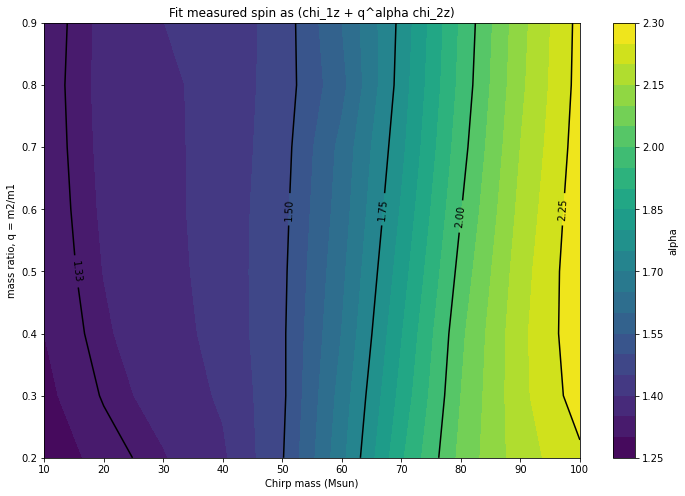

In [35]:
plt.figure(figsize=(12,8))
plt.contourf(Mcs, qs, -np.log(spin_ratio)/np.log(qs), levels=20)
plt.colorbar(label='alpha')
chi2_pow = plt.contour(Mcs, qs, -np.log(spin_ratio)/np.log(qs), colors='k', levels=[1.33, 1.5, 1.75, 2, 2.25])
plt.clabel(chi2_pow, fontsize=10)
plt.xlabel('Chirp mass (Msun)')
plt.ylabel('mass ratio, q = m2/m1')
plt.title('Fit measured spin as (chi_1z + q^alpha chi_2z)')
plt.savefig('Measured_spin_combination.png')